# Beijing Data Process
This notebook is used to process the data from the Beijing dataset

In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [9]:
# Aggregate flow in one month.

def aggregate_flow(year, month):
    df_work = pd.read_csv(r"data\北京TAZ交互流+用户属性统计\movesum_workday_taz_brand_filter5_{year}{month}.csv".format(year=year, month=str(month).zfill(2)))
    df_wknd = pd.read_csv(r"data\北京TAZ交互流+用户属性统计\movesum_weekend_taz_brand_filter5_{year}{month}.csv".format(year=year, month=str(month).zfill(2)))
    print(df_work.info(), df_wknd.info())
    
    # Group and sum the 'nums' based on (start_tazid, end_tazid) for both dataframes
    workday_agg = df_work.groupby(['start_tazid', 'end_tazid']).nums.sum().reset_index()
    weekend_agg = df_wknd.groupby(['start_tazid', 'end_tazid']).nums.sum().reset_index()

    # Concatenate both aggregated dataframes
    combined_df = pd.concat([workday_agg, weekend_agg])

    # Group and sum again on the concatenated dataframe
    final_agg = combined_df.groupby(['start_tazid', 'end_tazid']).nums.sum().reset_index()
    return final_agg


In [10]:
agg_flow = aggregate_flow(2018, 7)
agg_flow.to_csv('BJ_flow_2018_7.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11637200 entries, 0 to 11637199
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   nums         int64 
 1   start_h      int64 
 2   end_h        int64 
 3   start_tazid  int64 
 4   end_tazid    int64 
 5   apple_       object
 6   huawei_      object
 7   oppo_        object
 8   vivo_        object
 9   mi_          object
 10  honor_       object
 11  sanxing_     object
 12  meizu_       object
dtypes: int64(5), object(8)
memory usage: 1.1+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4326951 entries, 0 to 4326950
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   nums         int64 
 1   start_h      int64 
 2   end_h        int64 
 3   start_tazid  int64 
 4   end_tazid    int64 
 5   apple_       object
 6   huawei_      object
 7   oppo_        object
 8   vivo_        object
 9   mi_          object
 10  honor_       object
 11  sanxing_     obje

In [46]:
# Load the shapefile and get the taz_list
taz_shp = gpd.read_file(r"data\北京TAZ交互流+用户属性统计\TAZ2010_WGS84-All.shp")
print(taz_shp.info())

full_bj = False
if full_bj:
    taz_list = range(1, 1912)
    print(len(taz_list))
else:# extract 6 rings
    taz_shp = taz_shp.loc[taz_shp["Wuhuan"]!=0,:]
    print(taz_shp.info())
    taz_list = taz_shp["TAZID"].tolist()
    taz_list.sort()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TAZID       1911 non-null   int64   
 1   Shape_Leng  1911 non-null   float64 
 2   CODE        1911 non-null   object  
 3   CodeNum     1911 non-null   int64   
 4   District_I  1911 non-null   int64   
 5   Street      1911 non-null   int64   
 6   Wuhuan      1911 non-null   int64   
 7   Shape_Le_1  1911 non-null   float64 
 8   Shape_Area  1911 non-null   float64 
 9   liuhuan     1433 non-null   float64 
 10  geometry    1911 non-null   geometry
dtypes: float64(4), geometry(1), int64(5), object(1)
memory usage: 164.4+ KB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 707 entries, 141 to 1910
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TAZID       707 non-null    int64   
 1   Shape_Leng

In [28]:
taz_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [47]:
# Pivot the DataFrame to get the matrix format
flow_matrix_df = agg_flow.pivot(index='start_tazid', columns='end_tazid', values='nums')

# Ensure all TAZs from taz_list are present in the index (rows) and columns
flow_matrix_df = flow_matrix_df.reindex(index=taz_list, columns=taz_list)

# Fill NaN values with 0 (for TAZ pairs with no flow)
flow_matrix_df.fillna(0, inplace=True)

# Convert the pivoted DataFrame to a numpy array
flow_matrix = flow_matrix_df.values

print(flow_matrix)


[[3.8936e+04 2.5340e+03 1.6690e+03 ... 9.6000e+01 1.4000e+01 0.0000e+00]
 [2.4930e+03 2.6711e+04 2.2450e+03 ... 1.1000e+01 1.1000e+01 0.0000e+00]
 [1.5450e+03 2.1460e+03 3.9567e+04 ... 5.2000e+01 0.0000e+00 0.0000e+00]
 ...
 [9.3000e+01 1.3000e+01 3.3000e+01 ... 8.8208e+04 4.4160e+03 6.3000e+02]
 [3.1000e+01 5.2000e+01 0.0000e+00 ... 4.1770e+03 2.2199e+04 7.0000e+01]
 [0.0000e+00 6.0000e+00 0.0000e+00 ... 1.3170e+03 3.3400e+02 3.4220e+03]]


In [48]:
print(flow_matrix.shape)

(707, 707)


In [49]:
np.save('bj_flow_matrix_201807_wuhuan.npy',flow_matrix)

In [44]:
flow_test = np.load('bj_flow_matrix_201807.npy')
np.fill_diagonal(flow_test, 0)
print(flow_test)
print(flow_test.max())
print(flow_test.argmax()//1911)
print(flow_test.argmax()%1911)

[[   0. 2534. 1669. ...    0.    0.    0.]
 [2493.    0. 2245. ...    0.    0.    0.]
 [1545. 2146.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0. 3082. 9569.]
 [   0.    0.    0. ... 2924.    0. 2793.]
 [   0.    0.    0. ... 9795. 3057.    0.]]
193325.0
756
1514


In [42]:
np.fill_diagonal(flow_matrix, 0)
flow_matrix.max()

53412.0

In [76]:
flow_matrix = np.load(r'bj_flow_matrix_201807_liuhuan.npy')
# Convert the original flows to binary
flows_binary = (flow_matrix > 0).astype(int)

# Calculate the degrees based on the new definition
degrees_all = np.sum(np.logical_or(flows_binary, flows_binary.T), axis=1)

# find the nodes whose degree are lower than 5
nodes_to_remove = np.where(degrees_all < 100)[0]
print('Number of nodes to remove: ', (nodes_to_remove))

# Remove the ndoes from the matrix
reduced_matrix = np.delete(flow_matrix, nodes_to_remove, axis=0)
reduced_matrix = np.delete(reduced_matrix, nodes_to_remove, axis=1)
np.save(r'bj_flow_matrix_201807_liuhuan_reduced.npy', reduced_matrix)

Number of nodes to remove:  [ 406  415  439  441  599  700  793  795  883  964 1017 1036 1044 1047
 1077 1093 1097 1123 1125 1138 1193 1267 1268 1273 1321 1351 1418 1419
 1420 1424 1428]


: 

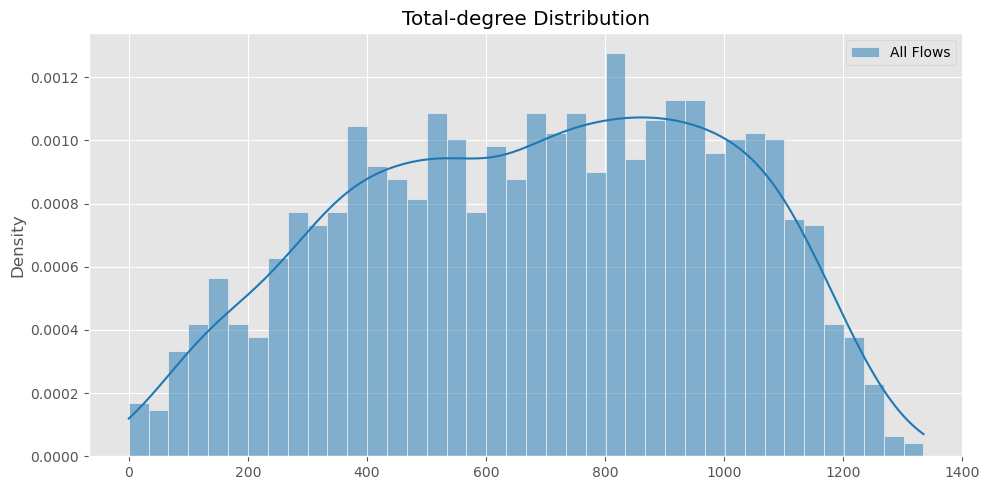

In [75]:
# Change the default style of matplotlib
matplotlib.style.use('ggplot')

# Set a color palette
palette = sns.color_palette("Paired")

# Plot the distributions
plt.figure(figsize=(10, 5))

sns.histplot(degrees_all, kde=True, stat="density", label='All Flows', color=palette[1], bins=40)
plt.title('Total-degree Distribution')
plt.legend()

plt.tight_layout()
plt.savefig("total_degree_distribution.png", dpi = 300)
plt.show()